In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import ast
import re
import nltk
import squarify
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import defaultdict
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from html.parser import HTMLParser
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from PIL import Image

In [4]:
users = pd.read_excel("./users.xlsx")
tweets = pd.read_excel("./tweets.xlsx")
replies = pd.read_excel("./replies.xlsx")
candidates = pd.read_excel("./Senator_candidates.xlsx")
mask = np.array(Image.open('./map.jpg'))

C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
# Add party information to each user
party = {}
for index, row in candidates.iterrows():
    party[row["TwitterId"]] = row["Party"]
party_list = []
for index, row in users.iterrows():
    party_list.append(party[row["username"]])
users["party"] = party_list

tweet_party = []
tweet_dict = {}
for index, row in tweets.iterrows():
    tweet_party.append(party[row["username"]])
    tweet_dict[row['tweetId']] = party[row["username"]] 
tweets['party'] = tweet_party

reply_party = []
for index, row in replies.iterrows():
    reply_party.append(tweet_dict[row["replyTo"]])
replies['party'] = reply_party

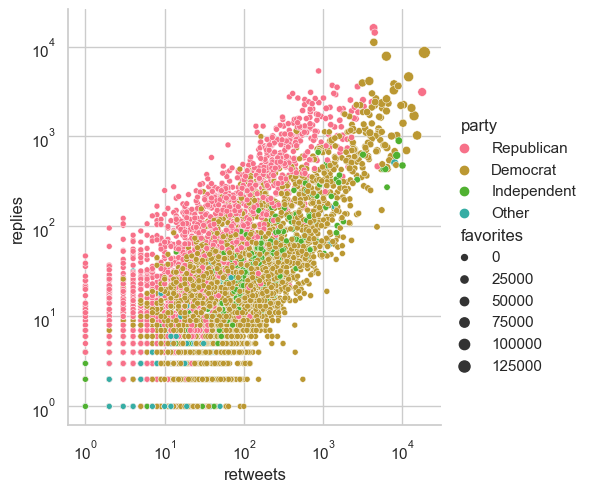

In [6]:
sns.set(style="whitegrid", palette="husl", color_codes=True)
s = sns.relplot(x="retweets", y="replies",  hue="party", size="favorites", data=tweets)
s.set(xscale="log", yscale="log")

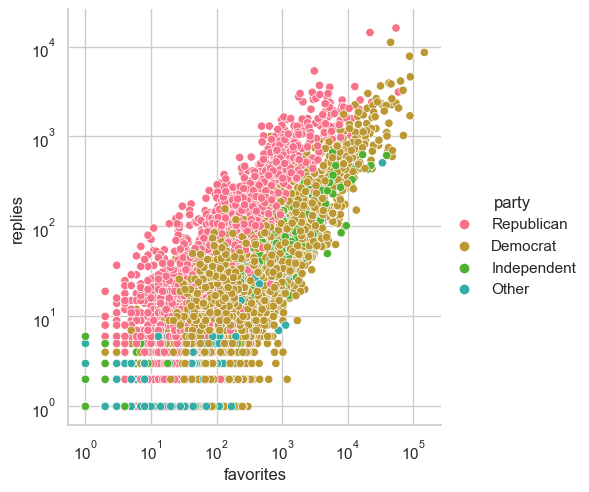

In [7]:
sns.set(style="whitegrid", palette="husl", color_codes=True)
s = sns.relplot(x="favorites", y="replies",  hue="party", data=tweets)
s.set(xscale="log", yscale="log")

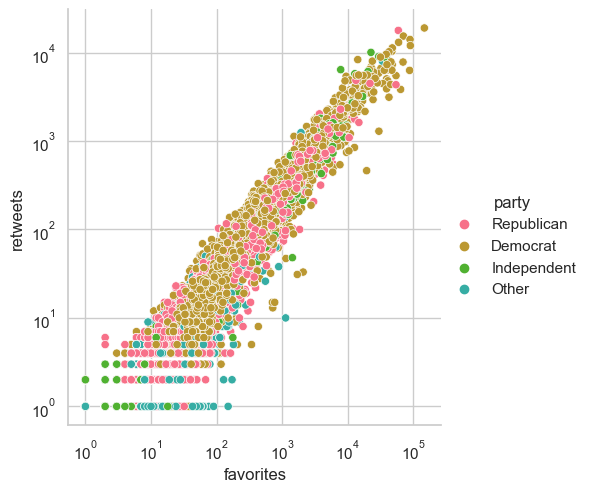

In [8]:
sns.set(style="whitegrid", palette="husl", color_codes=True)
s = sns.relplot(x="favorites", y="retweets",  hue="party", data=tweets)
s.set(xscale="log", yscale="log")

In [9]:
for index, row in tweets.iterrows():
    tweets.at[index, "hashtags"] = ast.literal_eval(row["hashtags"])
for index, row in replies.iterrows():
    replies.at[index, "hashtags"] = ast.literal_eval(row["hashtags"])
hashtag_l = []
for index, row in tweets.iterrows():
    for ht in row["hashtags"]:
        found = 0
        for h in hashtag_l:
            if ht == h["hashtag"] and party[row["username"]] == h["party"]:
                h["count"] += 1
                found = 1
                break
        if not found:
            hashtag_l.append({"hashtag":ht, "count":1, "party": party[row["username"]] })
            
for index, row in replies.iterrows():
    for ht in row["hashtags"]:
        found = 0
        for h in hashtag_l:
            if ht == h["hashtag"] and row['party'] == h["party"]:
                h["count"] += 1
                found = 1
                break
        if not found:
            hashtag_l.append({"hashtag":ht, "count":1, "party": row['party'] })
                
hashtag_df = pd.DataFrame(hashtag_l)                

In [10]:
hashtag_df.sort_values("count", ascending=False)[:40]

,hashtag,count,party
1348,SupportP2P1Pakistan,249,Democrat
1329,مهسا_امینی,186,Democrat
202,IASen,140,Democrat
903,alsen,94,Republican
517,MahsaAmini,92,Democrat
1342,OpIran,83,Democrat
1387,Mahsa_Amini,83,Democrat
3147,DeplorableLeora,65,Republican
1047,VoteBlueToSaveDemocracy,52,Republican
551,HurricaneIan,51,Democrat


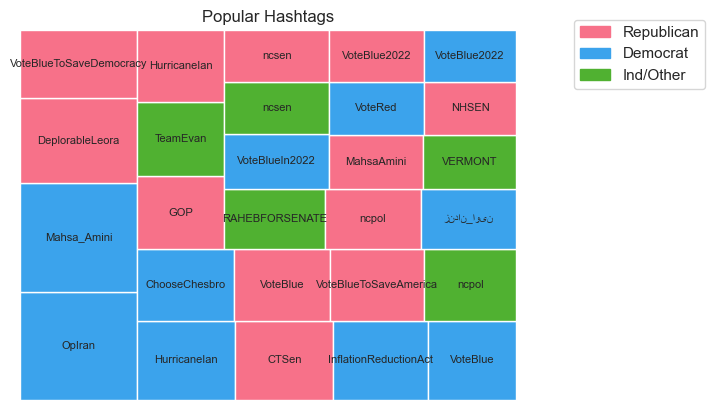

<Figure size 2000x1500 with 0 Axes>

In [11]:
sns.set_style(style="whitegrid") # set seaborn plot style
sq = hashtag_df.sort_values("count", ascending=False).loc[(hashtag_df["count"] > 30) & (hashtag_df["count"] < 90) ]
sizes= sq["count"].values# proportions of the categories
label=sq["hashtag"]
color=sns.color_palette("husl", 3)
colors = []
for p in sq["party"]:
    if p == "Republican":
        colors.append(color[0])
    elif p == "Democrat":
        colors.append(color[2])
    else:
        colors.append(color[1])
squarify.plot(sizes=sizes, label=label, color=colors, text_kwargs={'fontsize':8}).set(title='Popular Hashtags')
rep_patch = mpatches.Patch(color=color[0], label='Republican')
dem_patch = mpatches.Patch(color=color[2], label='Democrat')
oth_patch = mpatches.Patch(color=color[1], label='Ind/Other')
plt.legend(handles=[rep_patch, dem_patch, oth_patch], bbox_to_anchor=(1.1, 1.05))
plt.axis('off')
plt.figure(figsize=(20,15))
plt.show()

C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_38256\843190357.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  mentions.set_axis(handles, axis=1, inplace=True)
C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_38256\843190357.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  mentions.set_axis(handles, axis=0, inplace=True)
C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_38256\843190357.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  partyMentions.set_axis(parties, axis=1, inplace=True)
C:\Users\Arushi Jain\AppData\Local\Temp\ipykernel_38256\843190357.py:14: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be rem

[Text(0.5, 20.049999999999997, 'Party'),
 Text(47.24999999999999, 0.5, 'Cross-Mentions')]

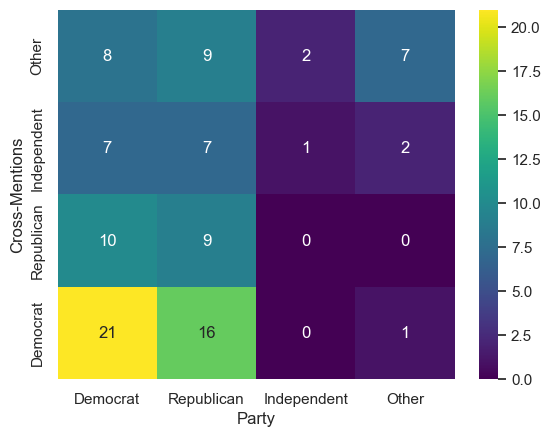

In [12]:
handles = users["username"].values
mentions = pd.DataFrame(np.zeros((len(handles), len(handles))))
mentions.set_axis(handles, axis=1, inplace=True)
mentions.set_axis(handles, axis=0, inplace=True)
for index, row in tweets.iterrows():
    tags = re.findall('@[a-zA-Z0-9_]*', row["text"])  
    for tag in tags:
        if tag[1:] in handles:
            mentions.at[row["username"], tag[1:]] += 1
parties = ["Democrat", "Republican", "Independent", "Other"]
partyMentions = pd.DataFrame(np.zeros((4, 4)))
partyMentions.set_axis(parties, axis=1, inplace=True)
parties.reverse()
partyMentions.set_axis(parties, axis=0, inplace=True)
for index, row in mentions.iterrows():
    for col in mentions.columns:
        if col!=index and row[col] > 0:
            partyMentions.at[party[index], party[col]] += 1
            
s = sns.heatmap(partyMentions, cmap="viridis", annot=True)
s.set(xlabel='Party', ylabel='Cross-Mentions')

In [15]:
parties = defaultdict(list)
for user in party:
    parties[party[user]].append(user)

In [19]:
def cleaner(tweet):
    tweet = tweet.lower()
    tweet = tweet.encode('ASCII', 'ignore').decode('ASCII')
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = re.sub(r"^RT[\s]+", "", tweet) #Remove RT
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if w.isalpha())
    stopwords = nltk.corpus.stopwords.words('english')
    words = nltk.tokenize.word_tokenize(tweet)
    new_words = [i for i in words if i not in stopwords]
    tweet = " ".join(new_words)
    return tweet
tweets['clean_text'] = tweets['text'].map(lambda x: cleaner(x))

In [20]:
def tokenize(document):
    lemma = WordNetLemmatizer().lemmatize
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

def tfidf(clean_text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    more_stopwords = ['help', 'support', 'make', 'state', 'thank', 'today', 'thats', 'ever', 'america', 'americans', 'american', 'people', 'right', 'senate', 'need', 'vote']
    stopwords.update(more_stopwords)
    vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((1,2)), stop_words = stopwords, strip_accents = 'unicode')
    tdm = vectorizer.fit_transform(clean_text)
    tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
    return tfidf_weights


C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


(-0.5, 1919.5, 1919.5, -0.5)

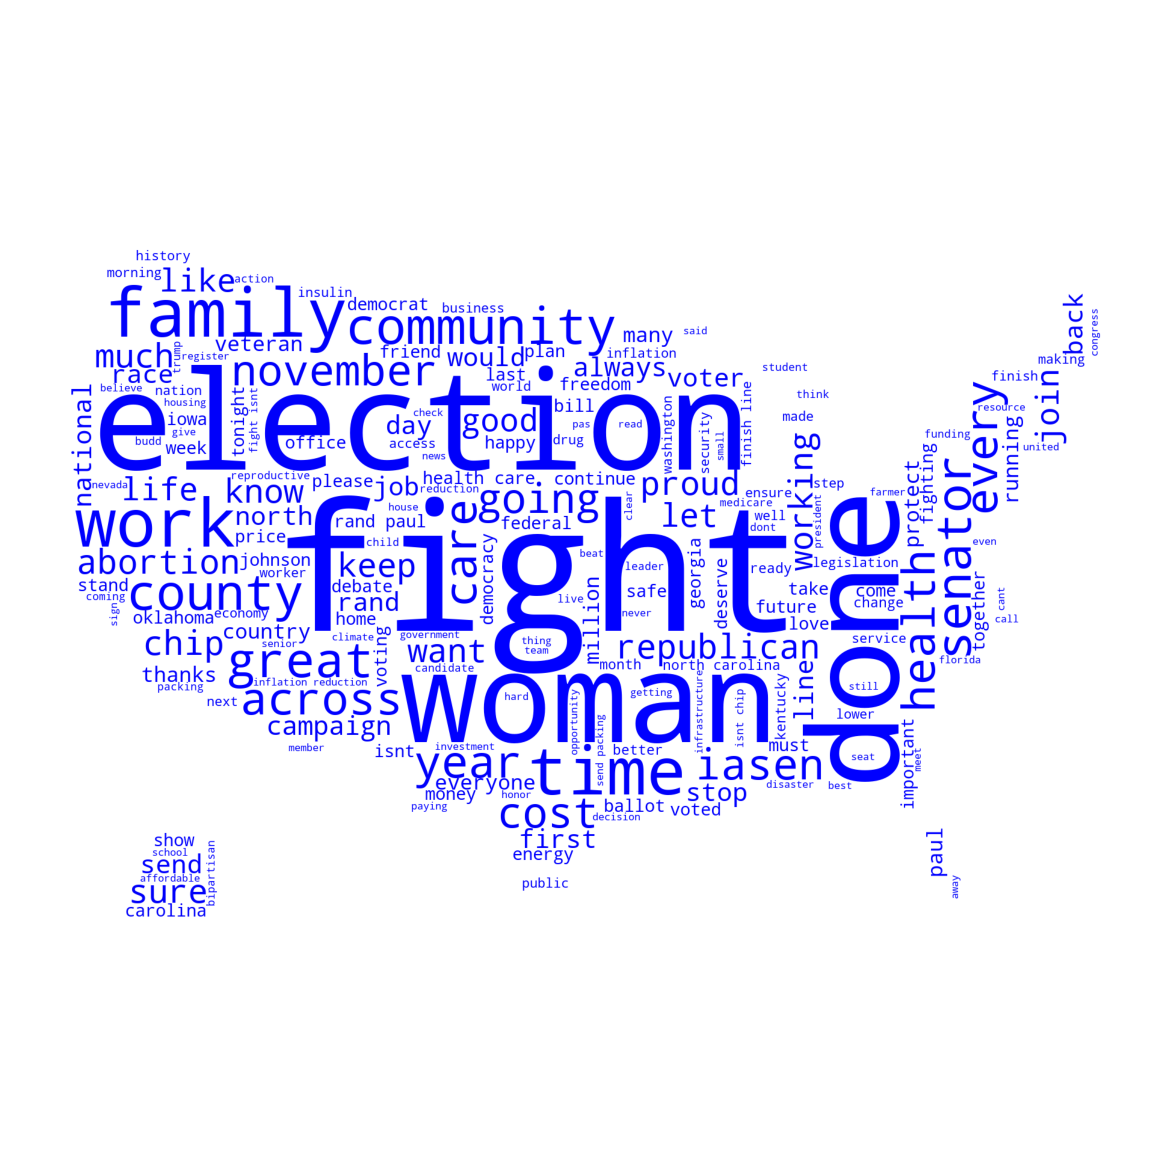

In [21]:
demWeights = tfidf((tweets[tweets['party'] == 'Democrat'])['clean_text'])
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=200, collocations=False, mask=mask).fit_words(dict(demWeights))
def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(240,100%%, %d%%)" % np.random.randint(49,51))
w.recolor(color_func = blue_color_func)
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')

C:\Users\Arushi Jain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


(-0.5, 1919.5, 1919.5, -0.5)

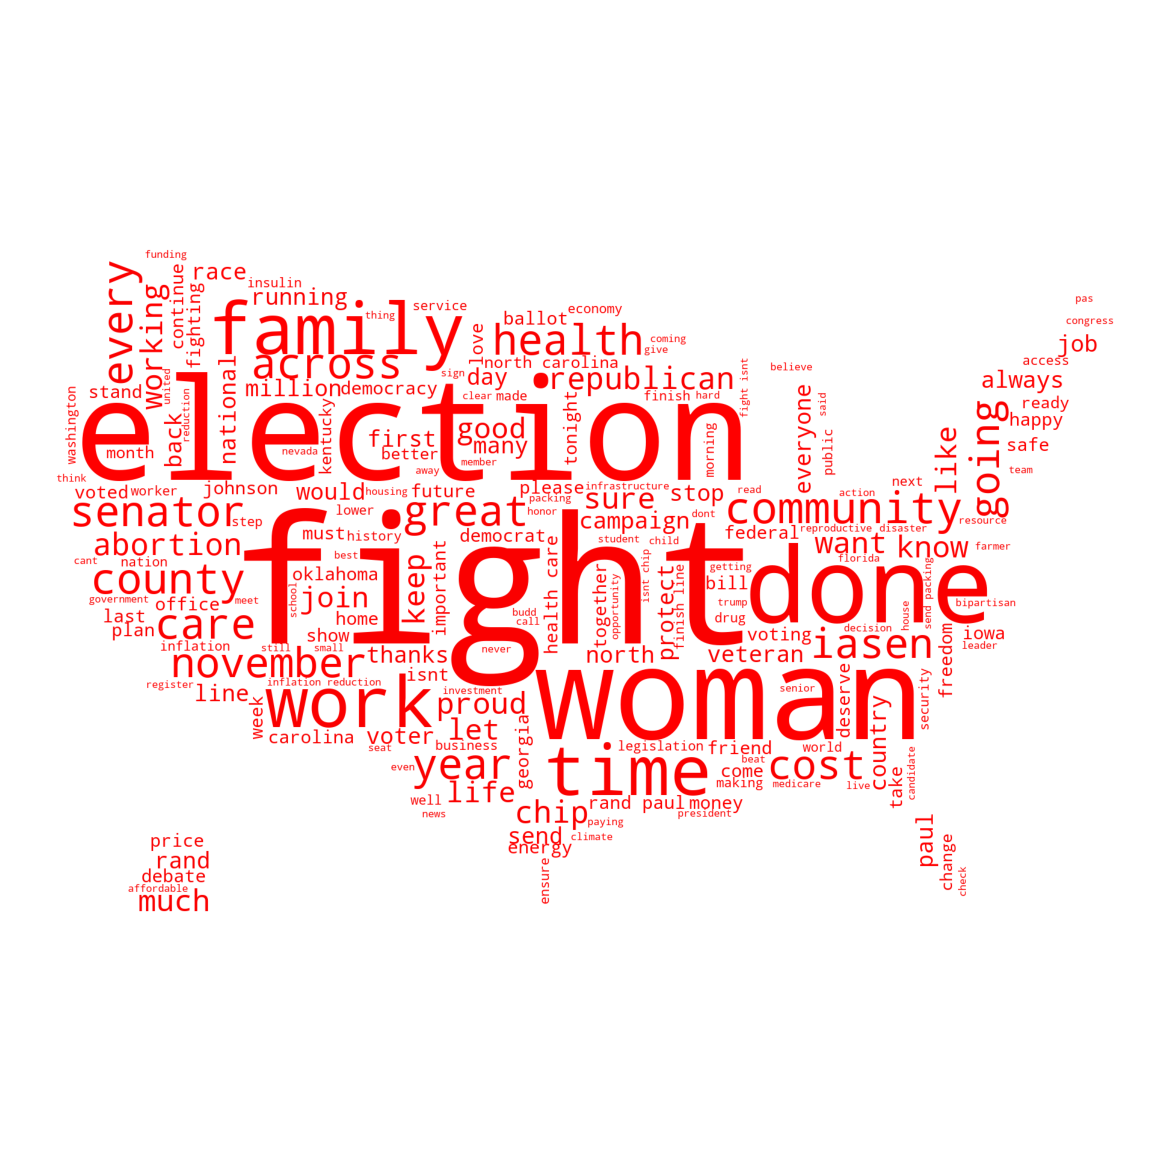

In [22]:
repWeights = tfidf((tweets[tweets['party'] == 'Republican'])['clean_text'])
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=200, collocations=False, mask=mask).fit_words(dict(demWeights))
def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(49,51))
w.recolor(color_func = red_color_func)
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')